In [38]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

In [39]:
# Provide the file path
file_path = "C:\\Users\\Hasan\\Desktop\\data science folder\\Copy of Week2_challenge_data_source(CSV).csv"  

# Load the CSV file into a DataFrame
data = pd.read_csv(file_path)
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Optional: Display all column names
print("Column Names:", data.columns.tolist())

# Display the first few rows
print(data.head())

Column Names: ['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer', 'Handset Type', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Soc

In [40]:
print(data.info()) # To Identify Data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [41]:
# Count missing values in each column
print(data.isnull().sum())

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [42]:
#Compute Z-scores to identify outliers
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = data[numerical_cols].apply(zscore)

# Detect outliers with Z-score threshold
outliers_z = (z_scores.abs() > 3).sum()
print(outliers_z)

Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

In [43]:
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

data['Start'] = data['Start'].fillna('Unknown')
data['End'] = data['End'].fillna('Unknown')
data['Last Location Name'] = data['Last Location Name'].fillna('Unknown')
# Verify
print("\nMissing values after filling:")
print(data.isnull().sum())


Missing values after filling:
Bearer Id                                     0
Start                                         0
Start ms                                      0
End                                           0
End ms                                        0
Dur. (ms)                                     0
IMSI                                          0
MSISDN/Number                                 0
IMEI                                          0
Last Location Name                            0
Avg RTT DL (ms)                               0
Avg RTT UL (ms)                               0
Avg Bearer TP DL (kbps)                       0
Avg Bearer TP UL (kbps)                       0
TCP DL Retrans. Vol (Bytes)                   0
TCP UL Retrans. Vol (Bytes)                   0
DL TP < 50 Kbps (%)                           0
50 Kbps < DL TP < 250 Kbps (%)                0
250 Kbps < DL TP < 1 Mbps (%)                 0
DL TP > 1 Mbps (%)                            0
UL TP < 1

In [44]:
#Get the top 10 most used handsets
# Check if 'Handset Type' column exists
if 'Handset Type' in data.columns:
    # Count the frequency of each handset type
    handset_counts = data['Handset Type'].value_counts()
    
    # Get the top 10 most used handsets
    top_10_handsets = handset_counts.head(10)
    
    print("Top 10 Handsets Used by Customers:")
    print(top_10_handsets)
else:
    print("'Handset Type' column not found in the dataset.")

Top 10 Handsets Used by Customers:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


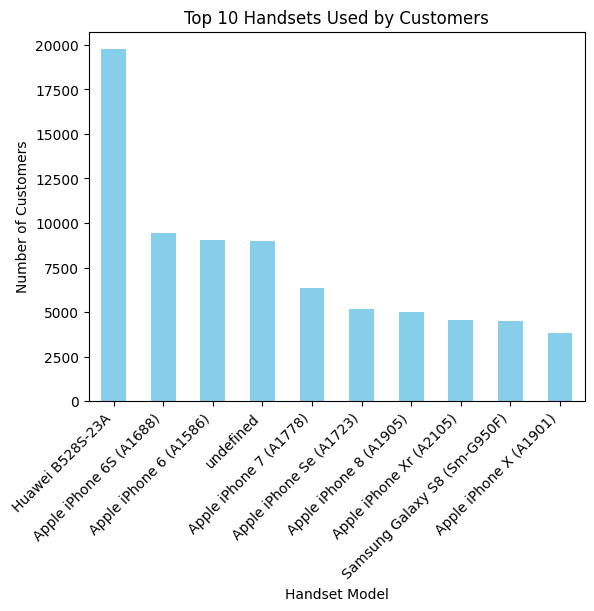

In [45]:
#Draw a bar chart to visualize the top 10 handsets:
# Plot the top 10 handsets
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title("Top 10 Handsets Used by Customers")
plt.xlabel("Handset Model")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")
plt.show()

In [46]:
# Extract manufacturer names
manufacturers = handset_counts.index.str.split().str[0]  # Extract first word (e.g., "Apple", "Huawei", "Samsung")

# Create a DataFrame with manufacturer counts
manufacturer_counts = handset_counts.groupby(manufacturers).sum().sort_values(ascending=False)

# Get the top 3 manufacturers
top_3_manufacturers = manufacturer_counts.head(3)

# Display results
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Type
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


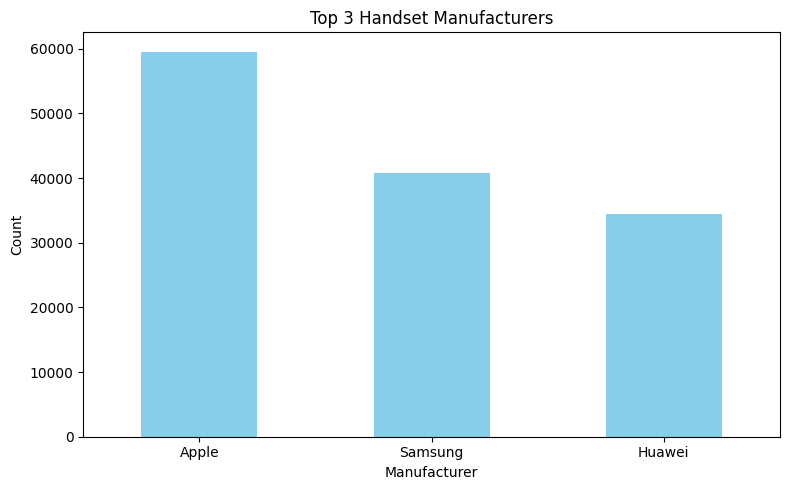

In [47]:
# Plot the results
top_3_manufacturers.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("Top 3 Handset Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [48]:
# Extract manufacturer names
manufacturers = handset_counts.index.str.split().str[0]  # Extract first word as manufacturer

# Create a DataFrame with manufacturers and handsets
handset_data = pd.DataFrame({
    'Manufacturer': manufacturers,
    'Handset': handset_counts.index,
    'Count': handset_counts.values
})

# Identify top 3 manufacturers
top_3_manufacturers = (
    handset_data.groupby('Manufacturer')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .index
)

# Filter handsets belonging to the top 3 manufacturers
filtered_handset_data = handset_data[handset_data['Manufacturer'].isin(top_3_manufacturers)]

# Identify top 5 handsets for each manufacturer
top_5_per_manufacturer = (
    filtered_handset_data.groupby('Manufacturer', group_keys=False)
    .apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))
)

# Display results
print("Top 5 Handsets per Top 3 Manufacturers:")
print(top_5_per_manufacturer)

Top 5 Handsets per Top 3 Manufacturers:
   Manufacturer                         Handset  Count
1         Apple         Apple iPhone 6S (A1688)   9419
2         Apple          Apple iPhone 6 (A1586)   9023
4         Apple          Apple iPhone 7 (A1778)   6326
5         Apple         Apple iPhone Se (A1723)   5187
6         Apple          Apple iPhone 8 (A1905)   4993
0        Huawei                Huawei B528S-23A  19752
17       Huawei                    Huawei E5180   2079
18       Huawei  Huawei P20 Lite Huawei Nova 3E   2021
22       Huawei                      Huawei P20   1480
31       Huawei                  Huawei Y6 2018    997
8       Samsung    Samsung Galaxy S8 (Sm-G950F)   4520
10      Samsung      Samsung Galaxy A5 Sm-A520F   3724
11      Samsung     Samsung Galaxy J5 (Sm-J530)   3696
12      Samsung     Samsung Galaxy J3 (Sm-J330)   3484
13      Samsung    Samsung Galaxy S7 (Sm-G930X)   3199


C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\2119736625.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by='Count', ascending=False).head(5))


In [49]:
# 1. Aggregate the number of xDR sessions per user
num_sessions = data.groupby('IMSI')['Bearer Id'].nunique().rename('Number_of_Sessions')

# 2. Aggregate the total session duration per user
total_duration = data.groupby('IMSI')['Dur. (ms)'].sum().rename('Total_Session_Duration_ms')

# 3. Aggregate total DL and UL data per user
total_download = data.groupby('IMSI')['Total DL (Bytes)'].sum().rename('Total_Download_Bytes')
total_upload = data.groupby('IMSI')['Total UL (Bytes)'].sum().rename('Total_Upload_Bytes')

# 4. Aggregate total data volume for each application per user
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Calculate total data volume for each application
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    data[f'{app}_Total_Bytes'] = data[f'{app} DL (Bytes)'] + data[f'{app} UL (Bytes)']

app_columns = [f'{app}_Total_Bytes' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']]
total_app_data = data.groupby('IMSI')[app_columns].sum()

# Combine all results into one DataFrame
user_summary = pd.concat([num_sessions, total_duration, total_download, total_upload, total_app_data], axis=1)

# Display the final user summary
print("Per-User Aggregated Summary:")
print(user_summary)

Per-User Aggregated Summary:
              Number_of_Sessions  Total_Session_Duration_ms  \
IMSI                                                          
2.040471e+14                   1                   869844.0   
2.040808e+14                   1                   877385.0   
2.082001e+14                   1                    86019.0   
2.082001e+14                   1                    86254.0   
2.082001e+14                   2                   573923.0   
...                          ...                        ...   
2.082099e+14                   1                   127367.0   
2.082099e+14                   1                   168543.0   
2.082099e+14                   1                    86399.0   
2.082522e+14                   1                    56613.0   
2.140743e+14                   1                   226790.0   

              Total_Download_Bytes  Total_Upload_Bytes  \
IMSI                                                     
2.040471e+14            78697597.0 

In [50]:
#Variable Transformations segment Users into Decile Classes Based on Total Session Duration
# Calculate total session duration per user
data['Total_DL_UL'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']  # Total data volume
user_summary = data.groupby('IMSI').agg({
    'Dur. (ms)': 'sum',         # Total session duration
    'Total_DL_UL': 'sum'        # Total data volume
}).rename(columns={'Dur. (ms)': 'Total_Duration_ms', 'Total_DL_UL': 'Total_Data_Volume'})

# Add decile classes based on total session duration
user_summary['Decile'] = pd.qcut(user_summary['Total_Duration_ms'], 10, labels=False) + 1

# Calculate total data volume per decile class
decile_summary = user_summary.groupby('Decile').agg({
    'Total_Duration_ms': 'sum',
    'Total_Data_Volume': 'sum'
}).reset_index()

# Display decile summary
print("Decile Summary:")
print(decile_summary)

# Save decile summary to CSV for reporting
decile_summary.to_csv("decile_summary.csv", index=False)


Decile Summary:
   Decile  Total_Duration_ms  Total_Data_Volume
0       1       2.146076e+08       5.457884e+12
1       2       4.283180e+08       6.106665e+12
2       3       7.565847e+08       6.552653e+12
3       4       1.067191e+09       6.177730e+12
4       5       8.561879e+08       5.070381e+12
5       6       1.255988e+09       6.452502e+12
6       7       1.582163e+09       6.176119e+12
7       8       1.874982e+09       7.844252e+12
8       9       2.492852e+09       9.330766e+12
9      10       5.162514e+09       1.519624e+13


In [51]:
#Non-Graphical Univariate Analysis
# Select quantitative variables
quantitative_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate dispersion parameters
dispersion_metrics = pd.DataFrame({
    'Range': data[quantitative_cols].max() - data[quantitative_cols].min(),
    'Variance': data[quantitative_cols].var(),
    'Standard Deviation': data[quantitative_cols].std(),
    'IQR': data[quantitative_cols].quantile(0.75) - data[quantitative_cols].quantile(0.25)
})

# Display results
print("Dispersion Metrics for Quantitative Variables:")
print(dispersion_metrics)


Dispersion Metrics for Quantitative Variables:
                                                 Range      Variance  \
Bearer Id                                 6.269004e+18  8.315146e+36   
Start ms                                  9.990000e+02  8.329624e+04   
End ms                                    9.990000e+02  8.299970e+04   
Dur. (ms)                                 1.852194e+06  6.567052e+09   
IMSI                                      1.002719e+13  4.599834e+20   
MSISDN/Number                             8.823635e+14  5.947410e+24   
IMEI                                      9.856119e+13  5.005776e+26   
Avg RTT DL (ms)                           9.692300e+04  3.128642e+05   
Avg RTT UL (ms)                           7.120000e+03  5.856831e+03   
Avg Bearer TP DL (kbps)                   3.781600e+05  5.746471e+08   
Avg Bearer TP UL (kbps)                   5.861300e+04  2.139377e+07   
TCP DL Retrans. Vol (Bytes)               4.294426e+09  1.374418e+16   
TCP UL Retrans. V

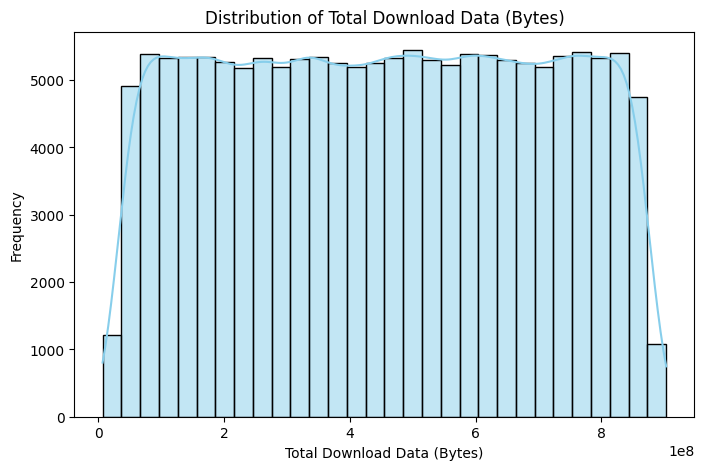

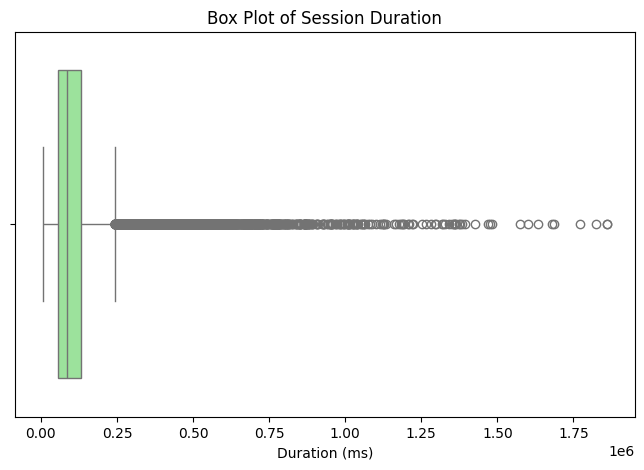

C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\2650478693.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")


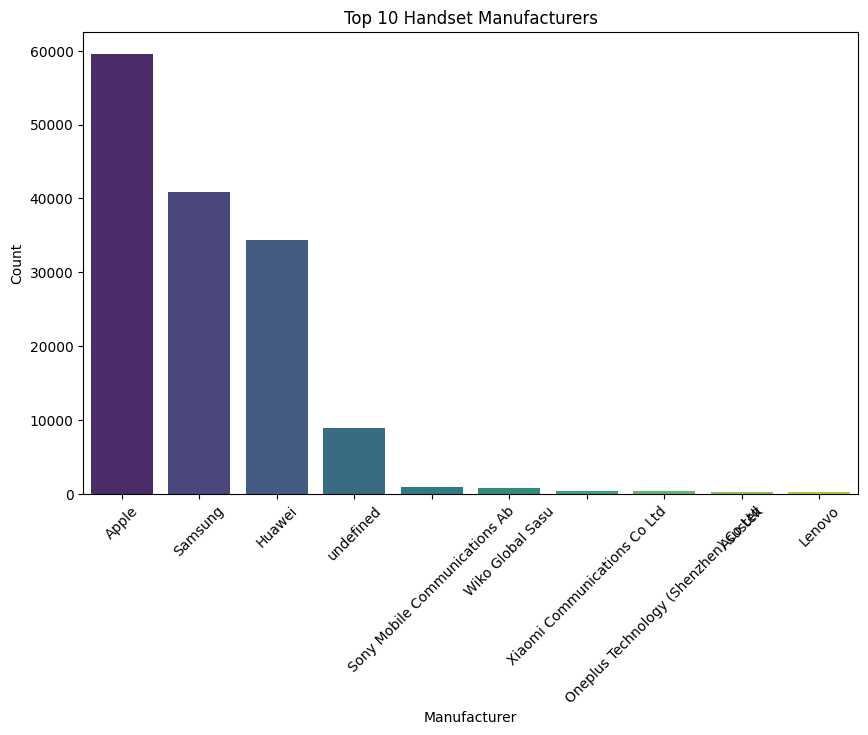

In [52]:
#Graphical Univariate Analysis
# Histogram for Total DL (Bytes)
plt.figure(figsize=(8, 5))
sns.histplot(data['Total DL (Bytes)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Download Data (Bytes)")
plt.xlabel("Total Download Data (Bytes)")
plt.ylabel("Frequency")
plt.show()

# Box plot for Session Duration
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Dur. (ms)'], color='lightgreen')
plt.title("Box Plot of Session Duration")
plt.xlabel("Duration (ms)")
plt.show()

# Bar plot for Handset Manufacturer
top_manufacturers = data['Handset Manufacturer'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")
plt.title("Top 10 Handset Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


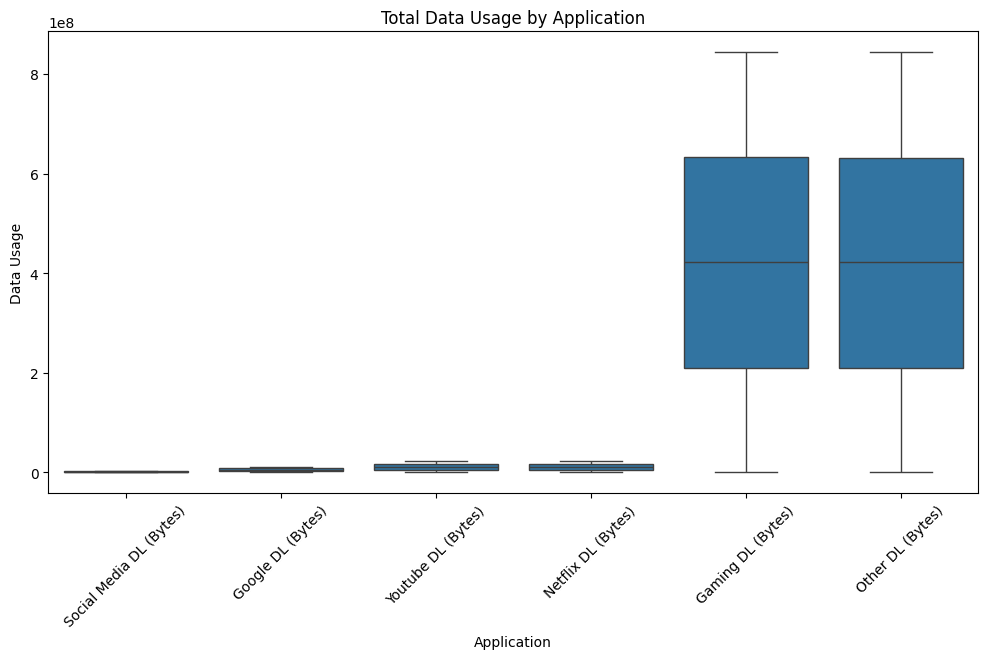

In [53]:
#Boxplot for Total Data Usage by Application
#List of applications for analysis
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 
                'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Reshape data for plotting
data_melted = data[applications].melt(var_name='Application', value_name='Data Usage')

# Create a boxplot to compare data usage across applications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application', y='Data Usage', data=data_melted)
plt.title('Total Data Usage by Application')
plt.xticks(rotation=45)
plt.show()

In [54]:
# Scatter Plot for Correlation Between Application Data Usage and Total Data Usage
# Pearson correlation (for linear relationships)
pearson_corr = data[['Social Media DL (Bytes)', 'Total DL (Bytes)']].corr(method='pearson')
print("Pearson Correlation between Social Media and Total Data Usage:")
print(pearson_corr)

# Spearman correlation (for non-linear relationships)
spearman_corr = data[['Social Media DL (Bytes)', 'Total DL (Bytes)']].corr(method='spearman')
print("Spearman Correlation between Social Media and Total Data Usage:")
print(spearman_corr)




Pearson Correlation between Social Media and Total Data Usage:
                         Social Media DL (Bytes)  Total DL (Bytes)
Social Media DL (Bytes)                 1.000000          0.005164
Total DL (Bytes)                        0.005164          1.000000
Spearman Correlation between Social Media and Total Data Usage:
                         Social Media DL (Bytes)  Total DL (Bytes)
Social Media DL (Bytes)                 1.000000          0.005103
Total DL (Bytes)                        0.005103          1.000000


In [55]:
#Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Calculate the total data used (Total DL + Total UL)
data['Total_Data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# Verify the new column was created
print(data[['Total DL (Bytes)', 'Total UL (Bytes)', 'Total_Data']].head())

   Total DL (Bytes)  Total UL (Bytes)   Total_Data
0       308879636.0        36749741.0  345629377.0
1       653384965.0        53800391.0  707185356.0
2       279807335.0        27883638.0  307690973.0
3       846028530.0        43324218.0  889352748.0
4       569138589.0        38542814.0  607681403.0


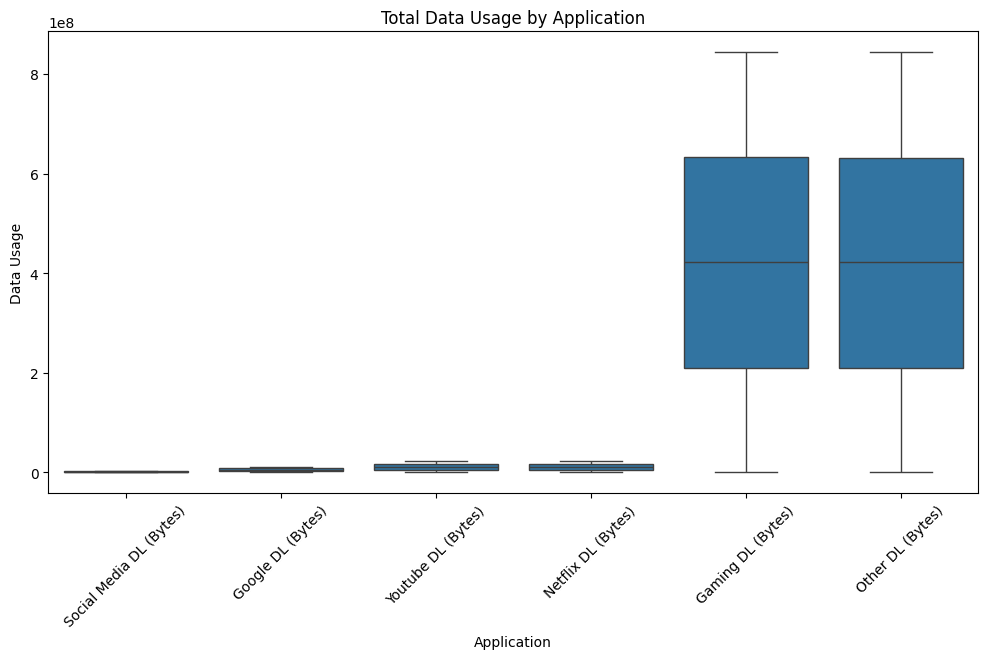

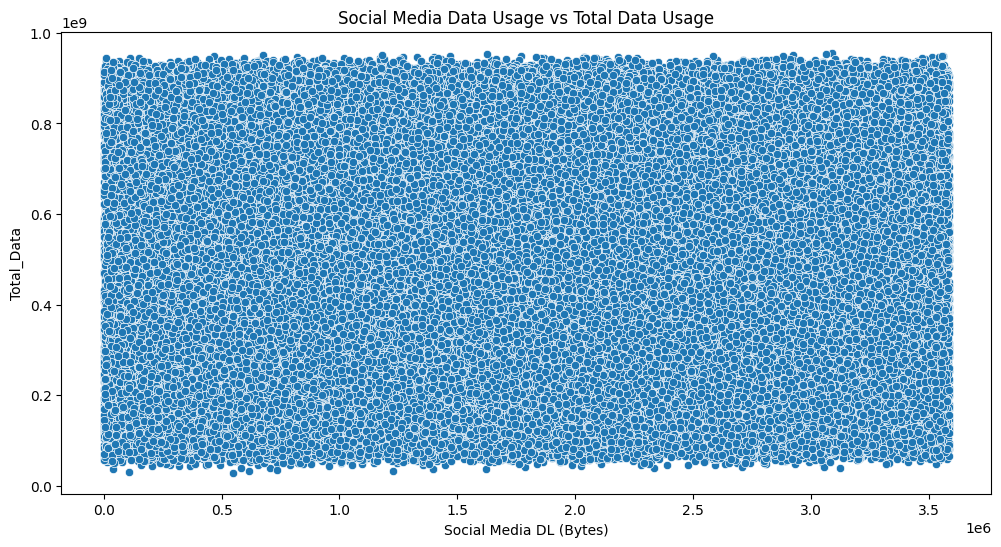

Pearson Correlation between Social Media and Total Data Usage:
                         Social Media DL (Bytes)  Total_Data
Social Media DL (Bytes)                  1.00000     0.00538
Total_Data                               0.00538     1.00000
Spearman Rank Correlation between Social Media and Total Data Usage:
                         Social Media DL (Bytes)  Total_Data
Social Media DL (Bytes)                 1.000000    0.005284
Total_Data                              0.005284    1.000000
ANOVA F-statistic: 346231.1987421581, p-value: 0.0


In [56]:
from scipy import stats

#Statistical Interpretation
# Strip leading/trailing spaces in the column names
data.columns = data.columns.str.strip()

# Calculate Total Data Usage (Total DL + Total UL)
data['Total_Data'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']

# List of application columns to explore
applications = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Youtube DL (Bytes)', 
                'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

# Reshape the data for plotting
data_melted = data[applications].melt(var_name='Application', value_name='Data Usage')

# Boxplot to compare the distribution of data usage across applications
plt.figure(figsize=(12, 6))
sns.boxplot(x='Application', y='Data Usage', data=data_melted)
plt.title('Total Data Usage by Application')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for each application data usage vs total data usage
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Social Media DL (Bytes)', y='Total_Data', data=data)
plt.title('Social Media Data Usage vs Total Data Usage')
plt.show()

# Compute Pearson correlation (for linear relationships)
pearson_corr = data[['Social Media DL (Bytes)', 'Total_Data']].corr(method='pearson')
print("Pearson Correlation between Social Media and Total Data Usage:")
print(pearson_corr)

# Compute Spearman correlation (for non-linear relationships)
spearman_corr = data[['Social Media DL (Bytes)', 'Total_Data']].corr(method='spearman')
print("Spearman Rank Correlation between Social Media and Total Data Usage:")
print(spearman_corr)

# Perform ANOVA for Social Media vs Google vs YouTube vs Netflix
f_stat, p_value = stats.f_oneway(data['Social Media DL (Bytes)'], 
                                 data['Google DL (Bytes)'], 
                                 data['Youtube DL (Bytes)'], 
                                 data['Netflix DL (Bytes)'], 
                                 data['Gaming DL (Bytes)'], 
                                 data['Other DL (Bytes)'])
print(f"ANOVA F-statistic: {f_stat}, p-value: {p_value}")

In [57]:

# Drop non-numeric and identifier columns
columns_to_drop = ['Bearer Id', 'Start', 'End', 'Start ms', 'End ms', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']
data_numeric = data.drop(columns=columns_to_drop, errors='ignore')

# Check for and handle missing values
data_numeric = data_numeric.fillna(data_numeric.mean())

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_numeric)

# Perform PCA
pca = PCA(n_components=0.95)  # Retain components that explain 95% of the variance
pca_data = pca.fit_transform(scaled_data)

# Results summary
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Save or display results
print(f"Number of components retained: {pca.n_components_}")
print(f"Explained variance by each component: {explained_variance}")
print(f"Cumulative variance explained: {cumulative_variance}")

# Save transformed data to a new CSV file
pca_data = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca.n_components_)])
pca_data.to_csv("dataset_pca.csv", index=False)
print("PCA-transformed data saved to 'dataset_pca.csv'")

Number of components retained: 31
Explained variance by each component: [0.134216   0.08926588 0.05267593 0.04551903 0.04393401 0.03606113
 0.03593391 0.0357239  0.03551533 0.03530097 0.03121665 0.03010522
 0.02825678 0.02612556 0.02601199 0.02499508 0.02033501 0.0181291
 0.01805353 0.01790408 0.0178555  0.01781701 0.01779152 0.01769282
 0.01759769 0.01665653 0.01358191 0.01309385 0.01249215 0.01104743
 0.00948732]
Cumulative variance explained: [0.134216   0.22348188 0.27615782 0.32167685 0.36561086 0.40167199
 0.4376059  0.4733298  0.50884513 0.5441461  0.57536274 0.60546796
 0.63372474 0.6598503  0.68586229 0.71085737 0.73119238 0.74932148
 0.76737501 0.78527909 0.80313459 0.8209516  0.83874312 0.85643594
 0.87403363 0.89069016 0.90427206 0.91736592 0.92985807 0.9409055
 0.95039282]
PCA-transformed data saved to 'dataset_pca.csv'


C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\244140404.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


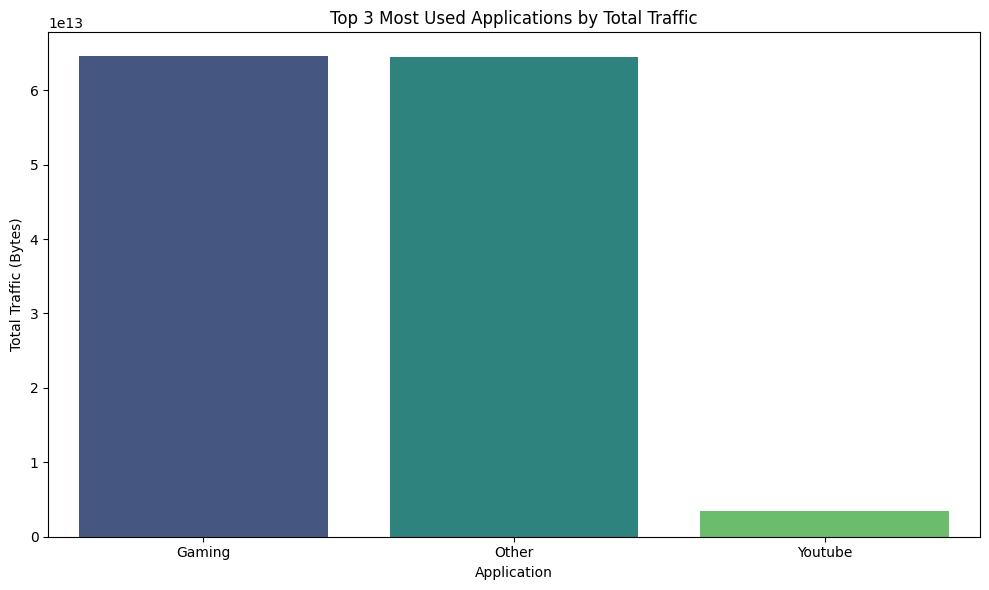

In [58]:
#User Engagement
# List of applications
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Calculate total traffic for each application
app_traffic = {}
for app in applications:
    # Calculate total traffic (DL + UL) for the application
    total_traffic = data[f'{app} DL (Bytes)'].sum() + data[f'{app} UL (Bytes)'].sum()
    app_traffic[app] = total_traffic

# Convert to a DataFrame for sorting and visualization
app_traffic_df = pd.DataFrame.from_dict(app_traffic, orient='index', columns=['Total_Traffic'])
app_traffic_df = app_traffic_df.sort_values(by='Total_Traffic', ascending=False)

# Select the top 3 applications
top_3_apps = app_traffic_df.head(3)

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot
sns.barplot(
    x=top_3_apps.index,
    y=top_3_apps['Total_Traffic'],
    palette="viridis"
)
plt.title("Top 3 Most Used Applications by Total Traffic")
plt.xlabel("Application")
plt.ylabel("Total Traffic (Bytes)")
plt.tight_layout()
plt.show()

In [59]:
# Aggregate metrics per customer (MSISDN/Number)
customer_metrics = data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Session frequency
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download traffic
    'Total UL (Bytes)': 'sum'   # Total upload traffic
}).rename(columns={
    'Bearer Id': 'Session_Frequency',
    'Dur. (ms)': 'Total_Session_Duration',
    'Total DL (Bytes)': 'Total_Download_Bytes',
    'Total UL (Bytes)': 'Total_Upload_Bytes'
})

# Calculate total traffic (download + upload)
customer_metrics['Total_Traffic'] = customer_metrics['Total_Download_Bytes'] + customer_metrics['Total_Upload_Bytes']

# 1. Normalize metrics
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(customer_metrics[['Session_Frequency', 'Total_Session_Duration', 'Total_Traffic']])
normalized_df = pd.DataFrame(normalized_metrics, columns=['Normalized_Session_Frequency', 'Normalized_Total_Session_Duration', 'Normalized_Total_Traffic'])

# 2. Run k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_metrics)
# Add cluster labels to the original DataFrame
customer_metrics['Engagement_Cluster'] = clusters
# 3. Analyze clusters
cluster_summary = customer_metrics.groupby('Engagement_Cluster').mean()
# Display results

print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
                    Session_Frequency  Total_Session_Duration  \
Engagement_Cluster                                              
0                            1.365998            1.356185e+05   
1                         1066.000000            7.255100e+07   
2                            4.669633            1.389447e+06   

                    Total_Download_Bytes  Total_Upload_Bytes  Total_Traffic  
Engagement_Cluster                                                           
0                           6.210634e+08        5.617726e+07   6.772407e+08  
1                           4.873783e+11        4.436642e+10   5.317447e+11  
2                           2.117432e+09        1.907476e+08   2.308179e+09  


In [60]:
#Experience Analytics
# Replace missing values for numerical columns with the mean
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Replace missing values for categorical columns with the mode
categorical_columns = ['Handset Type']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Treat outliers for numerical columns (IQR method)
def treat_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[outliers, column] = data[column].mean()
    for col in numerical_columns:
         treat_outliers(col)
         # Aggregate metrics per customer (MSISDN/Number)
customer_metrics = data.groupby('MSISDN/Number').agg({
    # Average TCP retransmission
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    # Average RTT
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    # Most frequent handset type
    'Handset Type': lambda x: x.mode()[0],
    # Average throughput
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg_TCP_DL_Retrans_Bytes',
    'TCP UL Retrans. Vol (Bytes)': 'Avg_TCP_UL_Retrans_Bytes',
    'Avg RTT DL (ms)': 'Avg_RTT_DL_ms',
    'Avg RTT UL (ms)': 'Avg_RTT_UL_ms',
    'Avg Bearer TP DL (kbps)': 'Avg_Throughput_DL_kbps',
    'Avg Bearer TP UL (kbps)': 'Avg_Throughput_UL_kbps'
})

# Display the aggregated data
print("Aggregated Metrics Per Customer:")
print(customer_metrics.head())

C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\307614468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\307614468.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

Aggregated Metrics Per Customer:
               Avg_TCP_DL_Retrans_Bytes  Avg_TCP_UL_Retrans_Bytes  \
MSISDN/Number                                                       
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360101e+10               1.066000e+03             759658.664811   
3.360101e+10               1.507977e+07             390430.332406   

               Avg_RTT_DL_ms  Avg_RTT_UL_ms                    Handset Type  \
MSISDN/Number                                                                 
3.360100e+10       46.000000       0.000000  Huawei P20 Lite Huawei Nova 3E   
3.360100e+10       30.000000       1.000000          Apple iPhone 7 (A1778)   
3.360100e+10      109.795706      17.662883                       undefined   
3.360101e+10       69.000000      15.000000         Apple iPhone 5S (A1457)   
3.360101e

In [61]:
#Experience Analytics
# Replace missing values for numerical columns with the mean
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Replace missing values for categorical columns with the mode
categorical_columns = ['Handset Type']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Treat outliers for numerical columns (IQR method)
def treat_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
    data.loc[outliers, column] = data[column].mean()
    for col in numerical_columns:
         treat_outliers(col)
         # Aggregate metrics per customer (MSISDN/Number)
customer_metrics = data.groupby('MSISDN/Number').agg({
    # Average TCP retransmission
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'TCP UL Retrans. Vol (Bytes)': 'mean',
    # Average RTT
    'Avg RTT DL (ms)': 'mean',
    'Avg RTT UL (ms)': 'mean',
    # Most frequent handset type
    'Handset Type': lambda x: x.mode()[0],
    # Average throughput
    'Avg Bearer TP DL (kbps)': 'mean',
    'Avg Bearer TP UL (kbps)': 'mean'
}).rename(columns={
    'TCP DL Retrans. Vol (Bytes)': 'Avg_TCP_DL_Retrans_Bytes',
    'TCP UL Retrans. Vol (Bytes)': 'Avg_TCP_UL_Retrans_Bytes',
    'Avg RTT DL (ms)': 'Avg_RTT_DL_ms',
    'Avg RTT UL (ms)': 'Avg_RTT_UL_ms',
    'Avg Bearer TP DL (kbps)': 'Avg_Throughput_DL_kbps',
    'Avg Bearer TP UL (kbps)': 'Avg_Throughput_UL_kbps'
})

# Display the aggregated data
print("Aggregated Metrics Per Customer:")
print(customer_metrics.head())

C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\307614468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


Aggregated Metrics Per Customer:
               Avg_TCP_DL_Retrans_Bytes  Avg_TCP_UL_Retrans_Bytes  \
MSISDN/Number                                                       
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360100e+10               2.080991e+07             759658.664811   
3.360101e+10               1.066000e+03             759658.664811   
3.360101e+10               1.507977e+07             390430.332406   

               Avg_RTT_DL_ms  Avg_RTT_UL_ms                    Handset Type  \
MSISDN/Number                                                                 
3.360100e+10       46.000000       0.000000  Huawei P20 Lite Huawei Nova 3E   
3.360100e+10       30.000000       1.000000          Apple iPhone 7 (A1778)   
3.360100e+10      109.795706      17.662883                       undefined   
3.360101e+10       69.000000      15.000000         Apple iPhone 5S (A1457)   
3.360101e

In [62]:
# Handle missing values by replacing with mean
numerical_columns = [
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]
for col in numerical_columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Function to compute top, bottom, and most frequent values
def compute_stats(column):
    top_10 = column.sort_values(ascending=False).head(10).tolist()  # Top 10
    bottom_10 = column[column > 0].sort_values().head(10).tolist()  # Bottom 10 (non-zero)
    most_frequent = column.value_counts().head(10).index.tolist()  # 10 most frequent values
    return top_10, bottom_10, most_frequent

# Compute stats for TCP, RTT, and Throughput
metrics = {
    "TCP DL Retrans": data['TCP DL Retrans. Vol (Bytes)'],
    "TCP UL Retrans": data['TCP UL Retrans. Vol (Bytes)'],
    "RTT DL": data['Avg RTT DL (ms)'],
    "RTT UL": data['Avg RTT UL (ms)'],
    "Throughput DL": data['Avg Bearer TP DL (kbps)'],
    "Throughput UL": data['Avg Bearer TP UL (kbps)']
     }

results = {}
for metric_name, metric_data in metrics.items():
    results[metric_name] = compute_stats(metric_data)

# Display results
for metric_name, (top_10, bottom_10, most_frequent) in results.items():
    print(f"\n{metric_name}:")
    print("Top 10:", top_10)
    print("Bottom 10:", bottom_10)
    print("Most Frequent:", most_frequent)

C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\3221309167.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)



TCP DL Retrans:
Top 10: [4294425570.0, 4291380336.0, 4289876615.0, 4289487601.0, 4288060364.0, 4275259349.0, 4268431996.0, 4259996826.0, 4256650017.0, 4254643827.0]
Bottom 10: [2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0]
Most Frequent: [20809914.27034193, 1330.0, 2660.0, 38.0, 92.0, 1318.0, 543.0, 3990.0, 76.0, 5320.0]

TCP UL Retrans:
Top 10: [2908226006.0, 2636857202.0, 2455599840.0, 2260359347.0, 1751383517.0, 1727810000.0, 1237861906.0, 794825766.0, 719571807.0, 526246337.0]
Bottom 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Most Frequent: [759658.6648110661, 1330.0, 2660.0, 1294.0, 3990.0, 1318.0, 5320.0, 6650.0, 2636.0, 7980.0]

RTT DL:
Top 10: [96923.0, 64640.0, 55811.0, 54847.0, 26971.0, 26250.0, 25873.0, 25602.0, 25374.0, 24733.0]
Bottom 10: [2.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 7.0]
Most Frequent: [109.79570605376027, 28.0, 27.0, 34.0, 35.0, 37.0, 36.0, 38.0, 29.0, 26.0]

RTT UL:
Top 10: [7120.0, 5607.0, 5422.0, 5279.0, 4677.0, 4226.0, 4021.0, 3923.0

In [63]:
# Convert 'Avg Bearer TP DL (kbps)' and 'Avg Bearer TP UL (kbps)' to bytes/second for throughput calculations
data['Avg Bearer TP DL (Bps)'] = data['Avg Bearer TP DL (kbps)'] * 125  # 1 kbps = 125 bytes/s
data['Avg Bearer TP UL (Bps)'] = data['Avg Bearer TP UL (kbps)'] * 125

# Calculate total average throughput per handset type
data['Total Throughput (Bps)'] = data['Avg Bearer TP DL (Bps)'] + data['Avg Bearer TP UL (Bps)']

# Group by handset type
handset_group = data.groupby('Handset Type')

# (d) Distribution of average throughput per handset type
avg_throughput = handset_group['Total Throughput (Bps)'].mean().sort_values(ascending=False)

# (e) Average TCP retransmissions per handset type
data['Total TCP Retransmissions (Bytes)'] = data['TCP DL Retrans. Vol (Bytes)'] + data['TCP UL Retrans. Vol (Bytes)']
avg_tcp_retrans = handset_group['Total TCP Retransmissions (Bytes)'].mean().sort_values(ascending=False)

# Display results
print("Distribution of Average Throughput per Handset Type:")
print(avg_throughput)

print("\nAverage TCP Retransmissions per Handset Type:")
print(avg_tcp_retrans)

Distribution of Average Throughput per Handset Type:
Handset Type
Huawei B715S-23C                    1.362428e+07
New-Bund Technol. Mix 2             1.315138e+07
Lg G6+                              1.251688e+07
Zyxel Communicat. Sbg3600           1.216888e+07
Huawei Y9 2019                      1.146738e+07
                                        ...     
Samsung Gt-S6310N                   2.500000e+02
Quectel Wireless. Quectel Ec21-E    2.500000e+02
Quectel Wireless. Quectel Ec25-E    1.250000e+02
Lg Lg-T385                          0.000000e+00
Wct Uno                             0.000000e+00
Name: Total Throughput (Bps), Length: 1396, dtype: float64

Average TCP Retransmissions per Handset Type:
Handset Type
Lg Lg-H635                             9.125491e+08
Huawei Bln-Al10                        3.291746e+08
Asustek Asus Zenfone Selfie Zd551Kl    3.216583e+08
Samsung Galaxy Tab S3 (Sm-T825)        2.027963e+08
Huawei E5776S-32                       1.688294e+08
                

In [64]:
# Select relevant experience metrics for clustering
# Columns: Replace with appropriate numeric columns if necessary
experience_metrics = data[[
    'Avg RTT DL (ms)', 
    'Avg RTT UL (ms)', 
    'Avg Bearer TP DL (kbps)', 
    'Avg Bearer TP UL (kbps)', 
    'TCP DL Retrans. Vol (Bytes)', 
    'TCP UL Retrans. Vol (Bytes)', 
    'DL TP < 50 Kbps (%)', 
    'UL TP < 10 Kbps (%)'
]]

# Handle missing values by replacing them with the mean
experience_metrics = experience_metrics.fillna(experience_metrics.mean())

# Standardize the metrics
scaler = StandardScaler()
scaled_metrics = scaler.fit_transform(experience_metrics)

# Perform K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_metrics)

# Add cluster labels to the original dataset
data['Experience_Cluster'] = clusters

# Calculate cluster centers and describe clusters
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), 
                               columns=experience_metrics.columns)

print("Cluster Centers (Representative Metrics for Each Cluster):")
print(cluster_centers)

Cluster Centers (Representative Metrics for Each Cluster):
   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0       114.242915        11.502438              2290.480506   
1        88.089135        30.695062             57291.060107   
2        99.169627        35.907567             41622.644404   

   Avg Bearer TP UL (kbps)  TCP DL Retrans. Vol (Bytes)  \
0               277.154939                 1.670362e+07   
1             17938.062778                 1.331443e+08   
2              3501.271396                 1.152538e+07   

   TCP UL Retrans. Vol (Bytes)  DL TP < 50 Kbps (%)  UL TP < 10 Kbps (%)  
0                 6.630443e+05            98.850423            99.694018  
1                 4.688306e+06            75.107872            87.227516  
2                 2.752057e+05            76.099647            96.912405  


In [65]:
# Brief description of each cluster
for cluster_id in range(3):
    cluster_data = data[data['Experience_Cluster'] == cluster_id]
    print(f"\nCluster {cluster_id} Summary:")
    print(cluster_data.describe())


Cluster 0 Summary:
          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.107000e+05  110700.000000  110700.000000  1.107000e+05  1.107000e+05   
mean   9.997876e+18     499.495584     498.332193  1.137067e+05  2.082017e+14   
std    2.880364e+18     288.151406     287.886474  8.678438e+04  2.495784e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     251.000000     251.000000  6.064050e+04  2.082010e+14   
50%    7.349883e+18     499.000000     499.500000  9.385550e+04  2.082015e+14   
75%    1.311448e+19     748.000000     749.000000  1.488182e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.107000e+05  1.107000e+05    110700.000000    110700.000000   
mean    4.477010e+10  4.363408e+13       114.244754        11.510062   
std     2.838814e+12  1.895215e+13

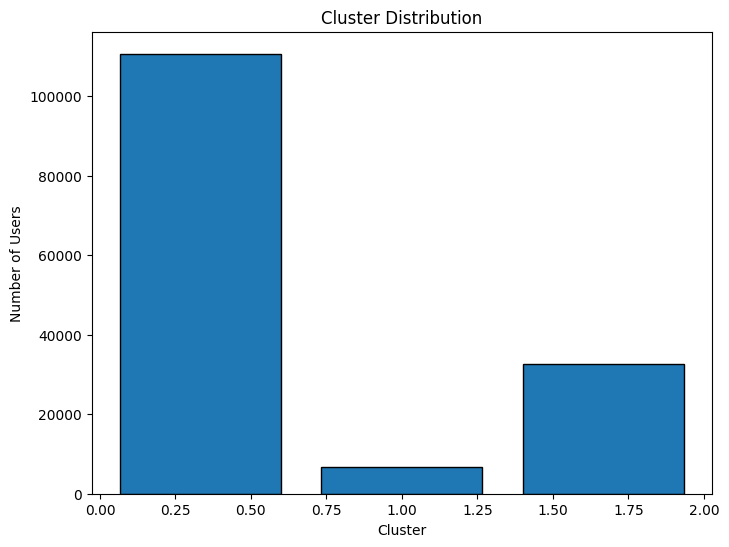

In [66]:
# Visualize cluster distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Experience_Cluster'], bins=3, edgecolor='black', align='mid', rwidth=0.8)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

In [75]:
#User Satisfaction Analysis
# Preprocess the dataset to calculate engagement metrics
# Calculate session frequency (number of sessions per IMSI)
session_frequency = data.groupby('IMSI').size()

# Calculate total session duration per IMSI
total_session_duration = data.groupby('IMSI')['Dur. (ms)'].sum()

# Calculate total traffic per IMSI (UL + DL)
total_traffic = data.groupby('IMSI').apply(
    lambda x: x['Total UL (Bytes)'].sum() + x['Total DL (Bytes)'].sum()
)

# Create engagement metrics DataFrame
engagement_metrics = pd.DataFrame({
    'Session_Frequency': session_frequency,
    'Total_Session_Duration': total_session_duration,
    'Total_Traffic (Bytes)': total_traffic
}).reset_index()

# Handle missing values by replacing them with the mean
engagement_metrics = engagement_metrics.fillna(engagement_metrics.mean())

# Standardize the metrics
scaler = StandardScaler()
scaled_engagement_metrics = scaler.fit_transform(engagement_metrics[['Session_Frequency', 
                                                                      'Total_Session_Duration', 
                                                                      'Total_Traffic (Bytes)']])

# Perform K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_engagement_metrics)

# Add cluster labels to the dataset
engagement_metrics['Engagement_Cluster'] = clusters

# Identify the "less engaged" cluster
# Assuming the "less engaged" cluster has the lowest mean session frequency
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Session_Frequency', 
                                                                 'Total_Session_Duration', 
                                                                 'Total_Traffic (Bytes)'])
less_engaged_cluster_id = cluster_centers['Session_Frequency'].idxmin()

# Compute the Euclidean distance between each user and the less engaged cluster center
less_engaged_center = cluster_centers.iloc[less_engaged_cluster_id].values
engagement_scores = scaled_engagement_metrics - less_engaged_center
engagement_metrics['Engagement_Score'] = np.linalg.norm(engagement_scores, axis=1)

# Display the results
print(engagement_metrics[['IMSI', 'Session_Frequency', 'Total_Session_Duration', 
                          'Total_Traffic (Bytes)', 'Engagement_Cluster', 'Engagement_Score']].head())




           IMSI  Session_Frequency  Total_Session_Duration  \
0  2.040471e+14                  1                869844.0   
1  2.040808e+14                  1                877385.0   
2  2.082001e+14                  1                 86019.0   
3  2.082001e+14                  1                 86254.0   
4  2.082001e+14                  2                573923.0   

   Total_Traffic (Bytes)  Engagement_Cluster  Engagement_Score  
0           1.391536e+08                   2          3.492230  
1           2.321240e+08                   2          3.515388  
2           8.517164e+07                   0          0.540526  
3           4.265016e+08                   0          0.236845  
4           1.033092e+09                   2          2.192073  


C:\Users\Hasan\AppData\Local\Temp\ipykernel_5616\1829755927.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  total_traffic = data.groupby('IMSI').apply(
